Net Profit per Customer Segment (Low, Medium, High) Scenario: The Marketing Team wants to categorize customers into segments based on their total net profit contribution and analyze how these segments are performing. Requirements: 1. Create a calculated field to calculate the total net profit per customer using the formula: SUM(after_discount - cogs). 2. Use a case statement or formula to categorize customers as "Low", "Medium", or "High" based on the total net profit: o Low: Less than $100 o Medium: Between $100 and $500 o High: Greater than $500 3. Create a pie chart to show the distribution of customers across these segments. Key Features to Use: • customer_id • after_discount • cogs

📊 Customer Segmentation (Low, Medium, High):
  Segment  Customer_Count
0    High            3877
1     Low             116
2  Medium               5


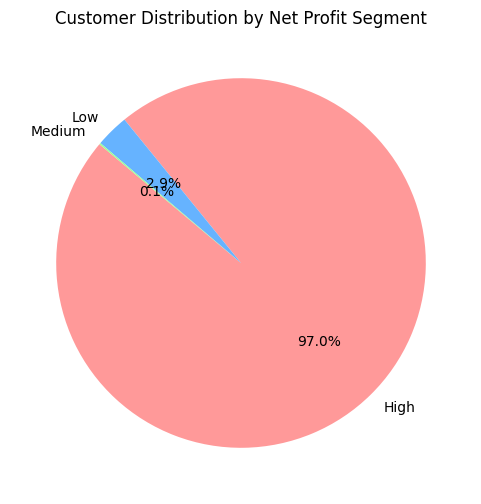

In [1]:
# 📌 Task: Net Profit per Customer Segment (Low, Medium, High)

import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Load dataset
file_path = r"C:\Users\bhave\OneDrive\Desktop\dashboard\dataset2\finaldataset.csv"
df = pd.read_csv(file_path)

# Step 2: Ensure order_date is datetime
df['order_date'] = pd.to_datetime(df['order_date'], errors='coerce')

# Step 3: Calculate net profit per transaction
df['net_profit'] = df['after_discount'] - df['cogs']

# Step 4: Aggregate net profit per customer
customer_profit = df.groupby('customer_id', as_index=False)['net_profit'].sum()

# Step 5: Categorize customers into Low, Medium, High segments
def categorize_profit(x):
    if x < 100:
        return "Low"
    elif 100 <= x <= 500:
        return "Medium"
    else:
        return "High"

customer_profit['segment'] = customer_profit['net_profit'].apply(categorize_profit)

# Step 6: Count customers in each segment
segment_distribution = customer_profit['segment'].value_counts().reset_index()
segment_distribution.columns = ['Segment', 'Customer_Count']

print("📊 Customer Segmentation (Low, Medium, High):")
print(segment_distribution)

# Step 7: Pie Chart Visualization
plt.figure(figsize=(6, 6))
plt.pie(
    segment_distribution['Customer_Count'],
    labels=segment_distribution['Segment'],
    autopct='%1.1f%%',
    startangle=140,
    colors=['#ff9999','#66b3ff','#99ff99']
)
plt.title("Customer Distribution by Net Profit Segment")
plt.show()
